In [1]:
import matplotlib.pyplot as plt
from highlight_text import fig_text
import numpy as np
import pandas as pd
import os
pd.set_option('display.max_columns', None)
from soccerplots.utils import add_image
from mplsoccer import PyPizza, FontManager
from mplsoccer import Radar, FontManager, grid
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
import os
from PyPDF2 import PdfMerger, PdfReader
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import highlight_text
pd.set_option('display.max_columns', None)
#from soccerplots.radar_chart import Radar
from soccerplots.utils import add_image
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
player = 'Pedro Neto'
per_90s = 64.5
final_dir = f"D:/Personal/Football Analysis/Analysis/Player Analysis/final_data"
current_dir = os.getcwd()

In [4]:
current_dir

'C:\\Users\\saransh.s\\Downloads\\Notebooks\\Analysis\\Clean Codes'

In [5]:
stats = ['standard_stats','shooting_stats','passing_stats','passing_types_stats',
         'gca_stats','defense_stats','possession_stats','playing_time_stats',
         'misc_stats']

In [6]:
os.chdir(final_dir)

In [7]:
df = pd.read_csv('defense_stats.csv')
df

,Unnamed: 0,Player,Span,Nation,Pos,Squad,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
0,0,Pedro Neto,2019-20 to 2023-24,pt POR,"FW,MF",Wolves,64.5,44,25,14,15,15,21,80,26.3,59,29,4,25,50,94,19,0
1,1,Leandro Trossard,2019-20 to 2023-24,be BEL,"FW,MF",2 squads,111.8,116,67,44,42,30,29,135,21.5,106,127,7,120,64,180,30,2
2,2,Daniel Podence,2020-21 to 2023-24,pt POR,"MF,FW",2 squads,60.8,57,34,28,19,10,12,67,17.9,55,32,2,30,30,87,9,0
3,3,Kaoru Mitoma,2022-23 to 2023-24,jp JPN,"FW,MF",Brighton,36.6,51,30,17,19,15,23,52,44.2,29,34,0,34,21,72,14,0


In [8]:
comp_dir = f"C:/Users/saransh.s/Downloads/Notebooks/Analysis/Clean Codes/Comparisions/{player}"
def_dir =f"C:/Users/saransh.s/Downloads/Notebooks/Analysis/Clean Codes/Comparisions/{player}/def"
goals_shots_dir = f"C:/Users/saransh.s/Downloads/Notebooks/Analysis/Clean Codes/Comparisions/{player}/goals_shots"
final_pass_carry_dir = f"C:/Users/saransh.s/Downloads/Notebooks/Analysis/Clean Codes/Comparisions/{player}/final_pass_carry"


# create the english directory if it doesn't exist
if not os.path.exists(comp_dir):
    os.mkdir(comp_dir)
    
if not os.path.exists(def_dir):
    os.mkdir(def_dir)
    
if not os.path.exists(goals_shots_dir):
    os.mkdir(goals_shots_dir)

if not os.path.exists(final_pass_carry_dir):
    os.mkdir(final_pass_carry_dir)

In [9]:
os.chdir(comp_dir)

In [10]:
#df.drop(['Unnamed: 0.1','Unnamed: 0','Span','Pos','Squad','Tkl%','Tkl+Int','Err'],axis=1,inplace=True)
df.drop(['Unnamed: 0','Span','Pos','Squad','Tkl%','Tkl+Int','Err'],axis=1,inplace=True)

In [11]:
#df.drop(['Unnamed: 0.1'],axis=1,inplace=True)

In [12]:
df.head()

,Player,Nation,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Lost,Blocks,Sh,Pass,Int,Clr
0,Pedro Neto,pt POR,64.5,44,25,14,15,15,21,80,59,29,4,25,50,19
1,Leandro Trossard,be BEL,111.8,116,67,44,42,30,29,135,106,127,7,120,64,30
2,Daniel Podence,pt POR,60.8,57,34,28,19,10,12,67,55,32,2,30,30,9
3,Kaoru Mitoma,jp JPN,36.6,51,30,17,19,15,23,52,29,34,0,34,21,14


In [13]:
os.chdir(final_dir)

In [14]:
df3 = pd.read_csv('misc_stats.csv')
df3.head()

,Unnamed: 0,Player,Span,Nation,Pos,Squad,90s,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
0,0,Pedro Neto,2019-20 to 2023-24,pt POR,"FW,MF",Wolves,64.5,14,0,0,57,91,12,430,50,25,1,0,0,302,29,75,27.9
1,1,Leandro Trossard,2019-20 to 2023-24,be BEL,"FW,MF",2 squads,111.8,5,0,0,84,105,33,327,64,67,2,1,0,516,24,79,23.3
2,2,Daniel Podence,2020-21 to 2023-24,pt POR,"MF,FW",2 squads,60.8,10,0,0,48,75,11,138,30,34,0,0,0,247,15,44,25.4
3,3,Kaoru Mitoma,2022-23 to 2023-24,jp JPN,"FW,MF",Brighton,36.6,3,0,0,38,44,12,66,21,30,1,0,0,167,22,24,47.8


In [15]:
df['Recoveries'] = df3['Recov']
df['Aerial Duels Won']=df3['Won']
df['Aerial Duels Lost'] = df3['Lost']
df.head()

,Player,Nation,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Lost,Blocks,Sh,Pass,Int,Clr,Recoveries,Aerial Duels Won,Aerial Duels Lost
0,Pedro Neto,pt POR,64.5,44,25,14,15,15,21,80,59,29,4,25,50,19,302,29,75
1,Leandro Trossard,be BEL,111.8,116,67,44,42,30,29,135,106,127,7,120,64,30,516,24,79
2,Daniel Podence,pt POR,60.8,57,34,28,19,10,12,67,55,32,2,30,30,9,247,15,44
3,Kaoru Mitoma,jp JPN,36.6,51,30,17,19,15,23,52,29,34,0,34,21,14,167,22,24


In [16]:
os.chdir(comp_dir)

In [17]:
all_players = df['Player'].tolist()
all_players = all_players[1:]
all_90s = df['90s'].tolist()
all_90s=all_90s[1:]

In [18]:
all_90s

[111.8, 60.8, 36.6]

In [19]:
player1_df = df.iloc[0:1,2:]
player1_df = player1_df.div(player1_df['90s'],axis=0)
player1_df_value = player1_df.iloc[:,1:].values.tolist()
player1_df_value =player1_df_value[0]
player1_df_value

[0.6821705426356589,
 0.3875968992248062,
 0.21705426356589147,
 0.23255813953488372,
 0.23255813953488372,
 0.32558139534883723,
 1.2403100775193798,
 0.9147286821705426,
 0.4496124031007752,
 0.06201550387596899,
 0.3875968992248062,
 0.7751937984496124,
 0.29457364341085274,
 4.682170542635659,
 0.4496124031007752,
 1.1627906976744187]

In [20]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [21]:
player1_df

,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Lost,Blocks,Sh,Pass,Int,Clr,Recoveries,Aerial Duels Won,Aerial Duels Lost
0,1.0,0.682171,0.387597,0.217054,0.232558,0.232558,0.325581,1.24031,0.914729,0.449612,0.062016,0.387597,0.775194,0.294574,4.682171,0.449612,1.162791


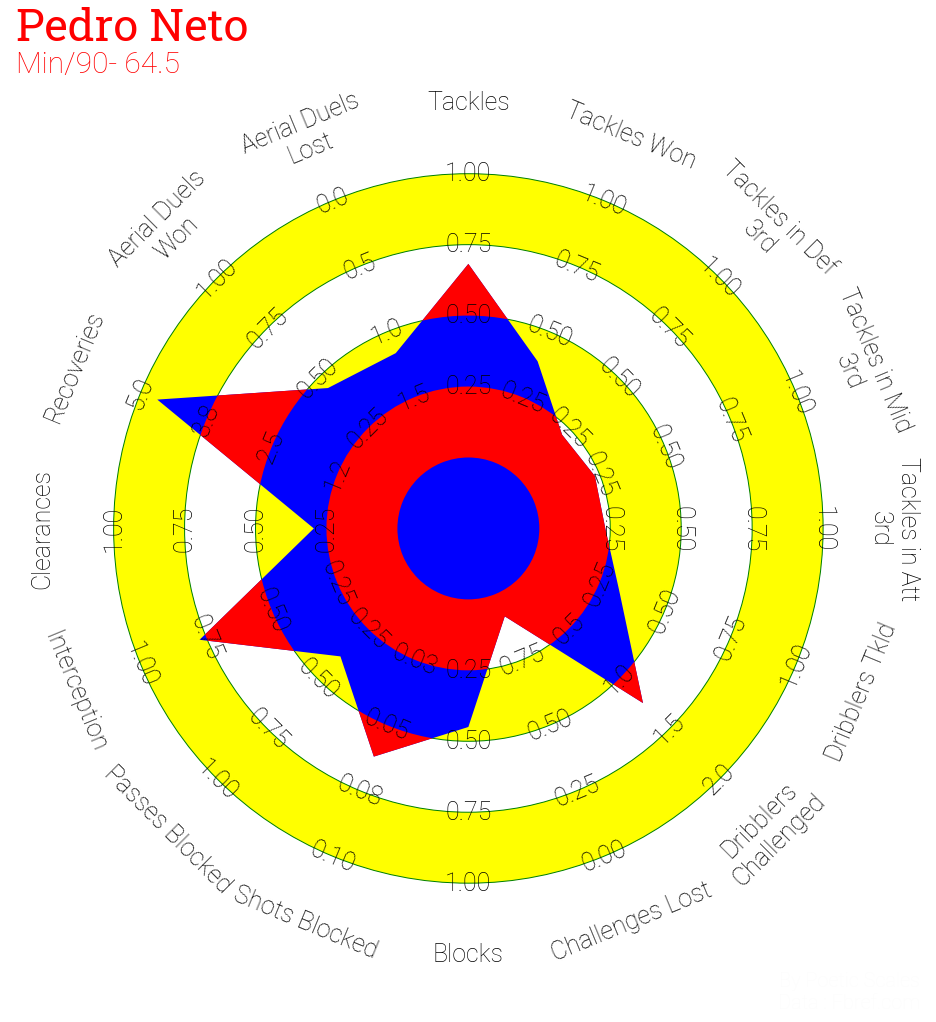

In [22]:
# player1_df = df.iloc[0:1,2:]
player1_df = player1_df.div(player1_df['90s'],axis=0)
player1_df_value = player1_df.iloc[:,1:].values.tolist()
player1_df_value =player1_df_value[0]
player1_df_value

params = ['Tackles','Tackles Won','Tackles in Def 3rd','Tackles in Mid 3rd','Tackles in Att 3rd'
          ,'Dribblers Tkld','Dribblers Challenged','Challenges Lost'
          ,'Blocks','Shots Blocked','Passes Blocked','Interception','Clearances','Recoveries','Aerial Duels Won'
          ,'Aerial Duels Lost']

low = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
high =[1,1,1,1,1,1,2,1,1,0.1,1,1,1,5,1,2]

lower_is_better = ['Challenges Lost','Aerial Duels Lost']

radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)


fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'])
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='yellow', edgecolor='green')
radar_output = radar.draw_radar(player1_df_value, ax=axs['radar'],
                                kwargs_radar={'facecolor': 'blue'},
                                kwargs_rings={'facecolor': 'red'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.9, "By Poetic Scales\nData : Fbref.com", fontsize=20,color='#fcfcfc',
                                       fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, player, fontsize=45, color='red',
                                fontproperties=robotto_bold.prop, ha='left', va='center')

title2_text = axs['title'].text(0.01, 0.05, f"Min/90- {per_90s}", fontsize=30,
                            fontproperties=robotto_thin.prop,
                            ha='left', va='center', color='red')
os.chdir(def_dir)
#plt.savefig(f"{player}_def.png")
my_pdf = PdfPages(f"{player}_def.pdf")
my_pdf.savefig()
my_pdf.close()

In [23]:
def comp_radar_chart(similar_player):
    player2_df = df.loc[df['Player']==similar_player]
    player2_90s = player2_df['90s']
    
    player2_df = player2_df.iloc[:,2:]
    player2_df = player2_df.div(player2_df['90s'],axis=0)
    player2_df_value = player2_df.iloc[:,1:].values.tolist()
    player2_df_value =player2_df_value[0]
    
    
    
    params = ['Tackles','Tackles Won','Tackles in Def 3rd','Tackles in Mid 3rd','Tackles in Att 3rd'
                  ,'Dribblers Tkld','Dribblers Challenged','Challenges Lost'
                  ,'Blocks','Shots Blocked','Passes Blocked','Interception','Clearances','Recoveries','Aerial Duels Won',
              'Aerial Duels Lost']

    low = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    high =[5,2,2,2,1,2,5,3,3,1,2,2,3,10,3,2]


    lower_is_better = ['Challenges Lost','Aerial Duels Lost']

    radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)
    
    fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

    # plot radar
    radar.setup_axis(ax=axs['radar'],facecolor='None')  # format axis as a radar
    rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
    radar_output = radar.draw_radar_compare(player1_df_value,player2_df_value, ax=axs['radar'],
                                            kwargs_radar={'facecolor': 'red', 'alpha': 0.6},
                                            kwargs_compare={'facecolor': '#01c49d', 'alpha': 0.6})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output
    range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=29,color='#fcfcfc',
                                           fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,color='#fcfcfc',
                                           fontproperties=robotto_thin.prop)
    axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                         c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
    axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                         c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

    # adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
    # Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
    endnote_text = axs['endnote'].text(0.99, 0.9, "By Poetic Scales\nData : Fbref.com", fontsize=20,color='#fcfcfc',
                                       fontproperties=robotto_thin.prop, ha='right', va='center')
    title1_text = axs['title'].text(0.01, 0.65, player, fontsize=45, color='red',
                                    fontproperties=robotto_bold.prop, ha='left', va='center')
    
    title2_text = axs['title'].text(0.01, 0.05, f"Min/90- {per_90s}", fontsize=30,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='red')

    title3_text = axs['title'].text(0.99, 0.65, similar_player, fontsize=35,
                                    fontproperties=robotto_bold.prop,
                                    ha='right', va='center', color='#01c49d')
    title4_text = axs['title'].text(0.99, 0.05, f"Min/90- {float(player2_90s)}", fontsize=30,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#01c49d')
    fig.set_facecolor('#121212')
    #plt.savefig(f"vs {similar_player}_def.png")
    my_pdf = PdfPages(f"vs {similar_player}_def.pdf")
    my_pdf.savefig()
    my_pdf.close()

In [24]:
df['Player'].unique()

array(['Pedro Neto', 'Leandro Trossard', 'Daniel Podence', 'Kaoru Mitoma'],
      dtype=object)

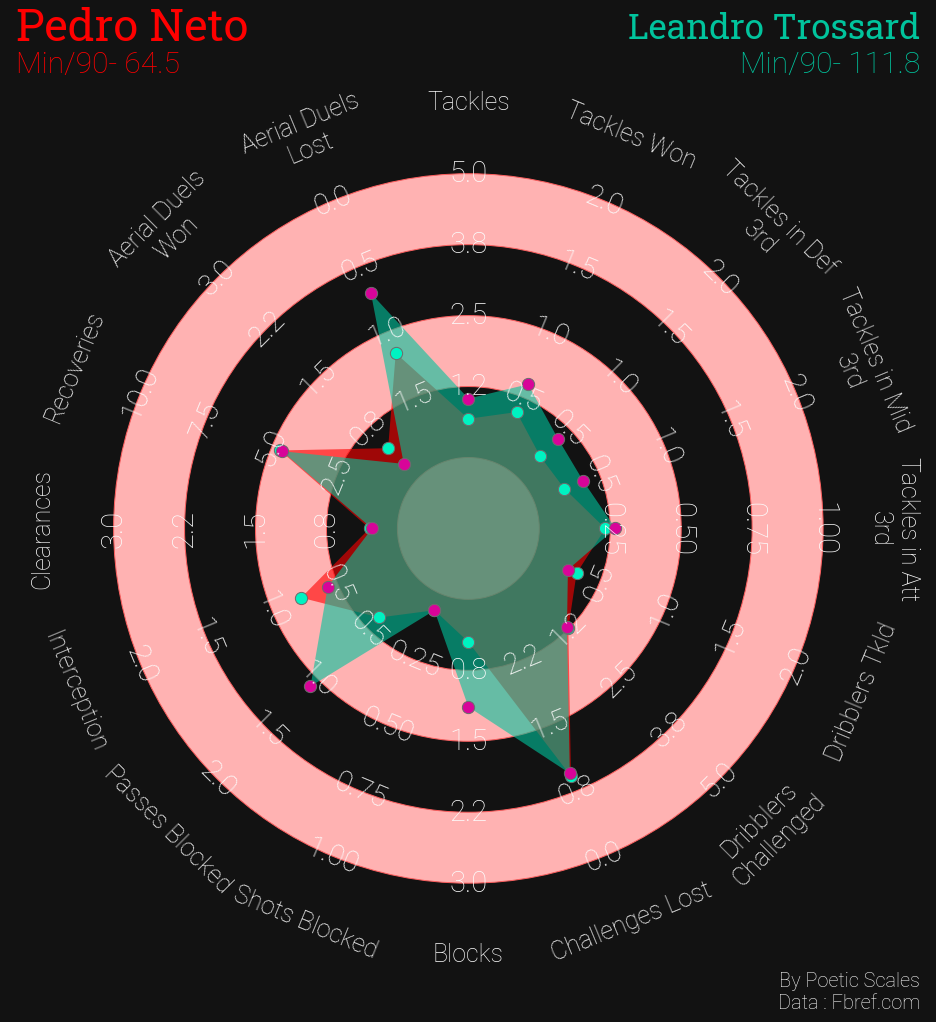

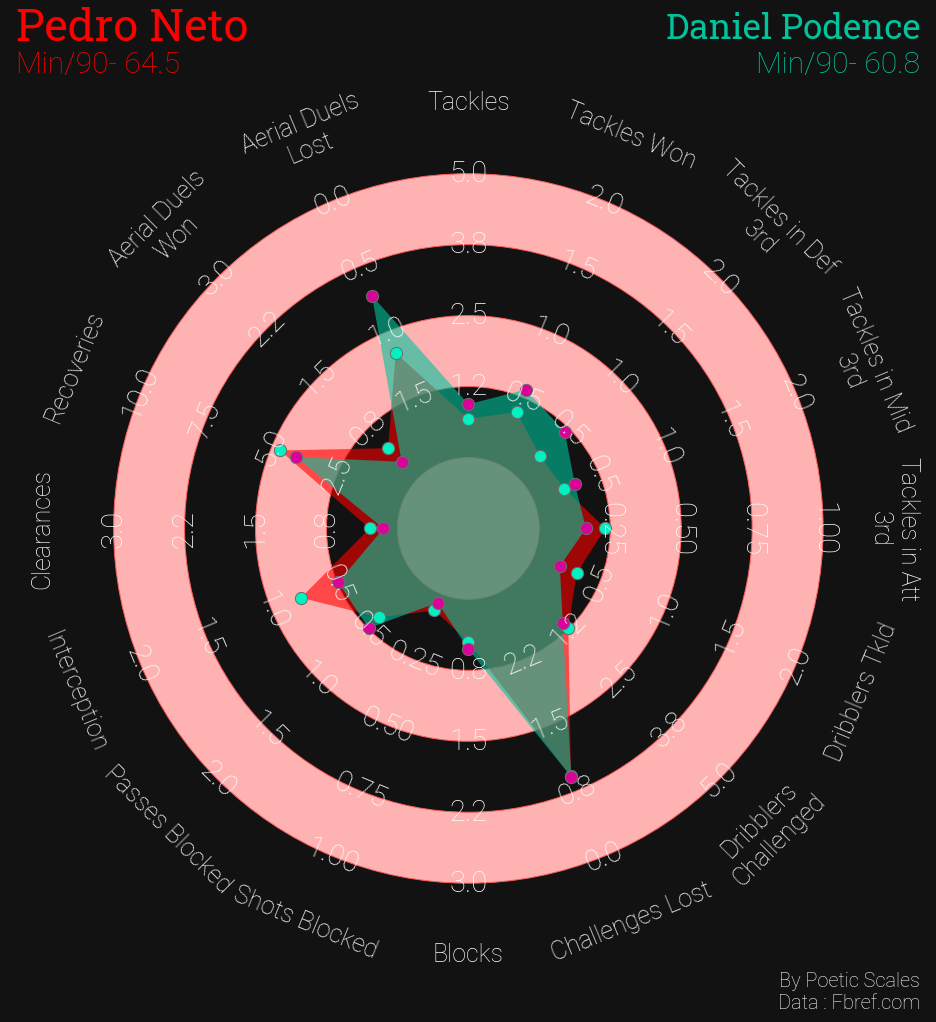

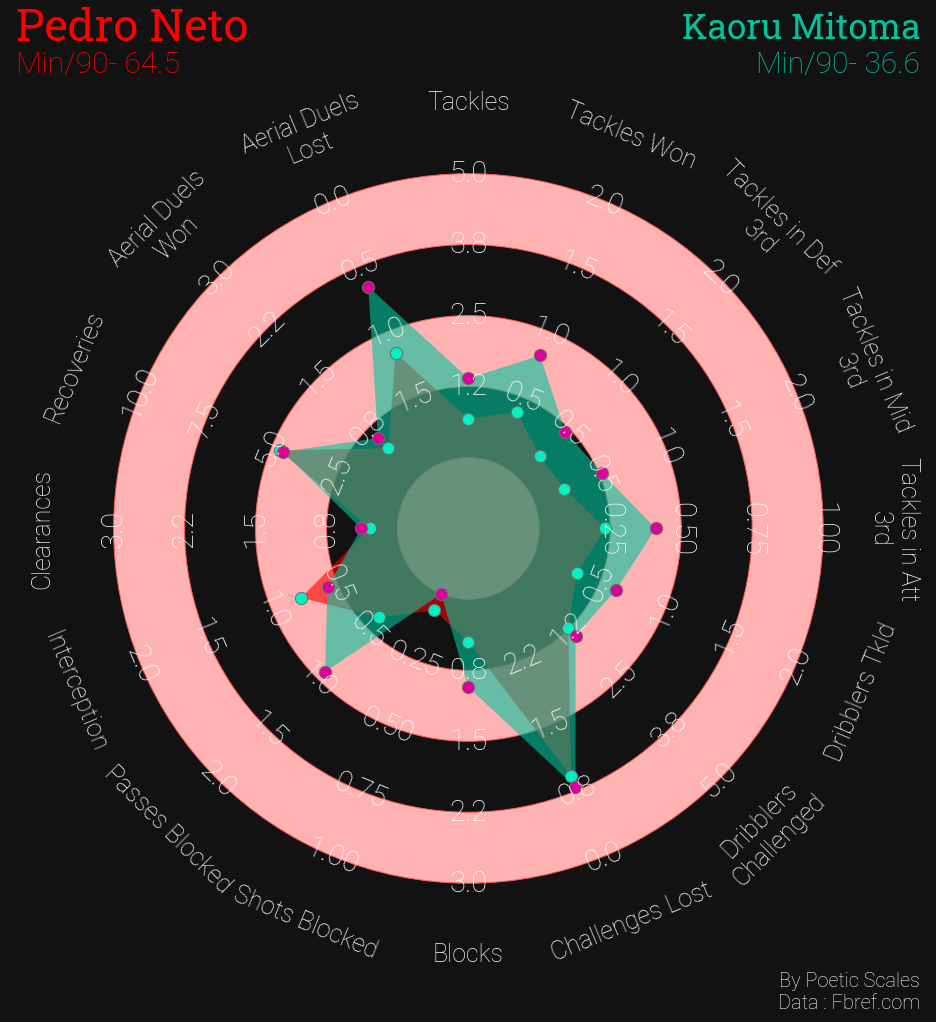

In [25]:
for i in all_players:
    comp_radar_chart(similar_player=i)

In [26]:
import os
from PyPDF2 import PdfMerger, PdfReader
file_list = os.listdir(def_dir)
file_list_sorted = sorted(file_list, key=lambda x: os.path.getmtime(os.path.join(def_dir, x)))
file_list_sorted

# Get a list of all PDF files in the directory
pdf_files = [f for f in file_list_sorted if f.endswith('.pdf')]

# Create a PdfFileMerger object
merger = PdfMerger()

# Loop through all the PDF files and append them to the merger object
for filename in pdf_files:
    with open(os.path.join(def_dir, filename), 'rb') as f:
        pdf_reader = PdfReader(f)
        merger.append(pdf_reader)
#os.chdir(team_player_pdf_dir)
# Write the merged PDF file to disk
with open(f"{player}_comparision_defense.pdf", 'wb') as f:
    merger.write(f)


In [27]:
os.chdir(final_dir)

# With the ball stats data preparations

In [28]:
df2 = pd.read_csv('gca_stats.csv')
df2.head()

,Unnamed: 0,Player,Span,Nation,Pos,Squad,90s,SCA,SCA90,PassLive,PassDead,TO,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1
0,0,André,2020 to 2023,br BRA,"MF,FW",Fluminense,73.6,159,2.16,136,0,8,2,4,9,9,0.12,7,0,2,0,0,0
1,1,Wataru Endo,2020-21 to 2023-24,jp JPN,MF,2 squads,97.8,222,2.27,181,1,5,10,14,11,18,0.18,13,0,0,1,3,1
2,2,Fabinho,2017-18 to 2023-24,br BRA,MF,3 squads,165.4,322,1.97,262,0,14,8,23,15,47,0.29,35,0,4,2,5,1
3,3,Jordan Henderson,2017-18 to 2023-24,eng ENG,MF,2 squads,142.9,359,2.53,321,13,5,10,5,5,41,0.29,37,1,0,2,1,0


In [29]:
df2.rename(columns={'TO':'SCA TO','TO.1':'GCA TO'}, inplace=True)

In [30]:
final_df = pd.DataFrame()
final_df = df2[['Player','Nation','Pos','90s','SCA','GCA','SCA TO','GCA TO']]
final_df

,Player,Nation,Pos,90s,SCA,GCA,SCA TO,GCA TO
0,André,br BRA,"MF,FW",73.6,159,9,8,2
1,Wataru Endo,jp JPN,MF,97.8,222,18,5,0
2,Fabinho,br BRA,MF,165.4,322,47,14,4
3,Jordan Henderson,eng ENG,MF,142.9,359,41,5,0


In [31]:
df4 = pd.read_csv('passing_stats.csv')
df4.head()

,Unnamed: 0,Player,Span,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP
0,0,André,2020 to 2023,br BRA,"MF,FW",Fluminense,73.6,4734,5127,92.3,75688,22032,2474,2607,94.9,1783,1872,95.2,344,418,82.3,2,3.1,3.5,-1.1,56,446,24,3,431
1,1,Wataru Endo,2020-21 to 2023-24,jp JPN,MF,2 squads,97.8,3975,4903,81.1,67168,21376,1851,2167,85.4,1674,1928,86.8,341,511,66.7,9,7.9,8.7,1.1,94,439,61,4,525
2,2,Fabinho,2017-18 to 2023-24,br BRA,MF,3 squads,165.4,9354,10722,87.2,160743,43769,4204,4620,91.0,4108,4534,90.6,811,1145,70.8,11,11.3,10.7,-0.3,108,824,110,8,939
3,3,Jordan Henderson,2017-18 to 2023-24,eng ENG,MF,2 squads,142.9,9739,11581,84.1,171773,45610,4309,4722,91.3,4132,4723,87.5,1020,1579,64.6,17,15.0,17.7,2.0,147,1128,212,44,1209


In [32]:
df4.rename(columns={'1/3':'Passes in final 3rd','01-Mar':'Passes in final 3rd'},inplace=True)

In [33]:
final_df['PrgDist of Passes'] = df4['PrgDist']
final_df['Ast'] =df4['Ast'] 
final_df['xA'] = df4['xA']
final_df['KP'] =df4['KP']
final_df['Passes in final 3rd'] = df4['Passes in final 3rd']
final_df['PPA'] = df4['PPA']
final_df['CrsPA'] = df4['CrsPA']
final_df['PrgP'] = df4['PrgP']

In [34]:
final_df

,Player,Nation,Pos,90s,SCA,GCA,SCA TO,GCA TO,PrgDist of Passes,Ast,xA,KP,Passes in final 3rd,PPA,CrsPA,PrgP
0,André,br BRA,"MF,FW",73.6,159,9,8,2,22032,2,3.5,56,446,24,3,431
1,Wataru Endo,jp JPN,MF,97.8,222,18,5,0,21376,9,8.7,94,439,61,4,525
2,Fabinho,br BRA,MF,165.4,322,47,14,4,43769,11,10.7,108,824,110,8,939
3,Jordan Henderson,eng ENG,MF,142.9,359,41,5,0,45610,17,17.7,147,1128,212,44,1209


In [35]:
df5  =pd.read_csv('passing_types_stats.csv')
df5.head()

,Unnamed: 0,Player,Span,Nation,Pos,Squad,90s,Att,Live,Dead,FK,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp,Off,Blocks
0,0,André,2020 to 2023,br BRA,"MF,FW",Fluminense,73.6,5127,4993,128,117,7,42,11,11,0,0,0,0,4734,6,57
1,1,Wataru Endo,2020-21 to 2023-24,jp JPN,MF,2 squads,97.8,4903,4807,77,62,19,22,16,15,0,0,0,0,3975,19,98
2,2,Fabinho,2017-18 to 2023-24,br BRA,MF,3 squads,165.4,10722,10495,206,178,23,51,41,27,0,0,0,0,9354,21,88
3,3,Jordan Henderson,2017-18 to 2023-24,eng ENG,MF,2 squads,142.9,11581,11211,342,152,43,93,254,104,10,1,4,0,9739,28,155


In [36]:
final_df['Passes_offside'] = df5['Off']
final_df['Passes_Blocked'] =df5['Blocks'] 

In [37]:
df6 = pd.read_csv('possession_stats.csv')
df6.head()

,Unnamed: 0,Player,Span,Nation,Pos,Squad,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Att,Succ,Succ%,Tkld,Tkld%,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,0,André,2020 to 2023,br BRA,"MF,FW",Fluminense,73.6,5805,310,1626,3559,688,18,5805,200,138,69.0,54,27.0,3867,19489,11071,110,132,6,88,58,4384,58
1,1,Wataru Endo,2020-21 to 2023-24,jp JPN,MF,2 squads,97.8,6081,322,1586,3574,994,131,6081,162,101,62.3,54,33.3,3233,14585,7307,101,98,15,157,147,4007,169
2,2,Fabinho,2017-18 to 2023-24,br BRA,MF,3 squads,165.4,12238,449,2683,8017,1617,116,12232,120,81,67.5,35,29.2,7190,32797,16595,171,178,15,107,77,8560,188
3,3,Jordan Henderson,2017-18 to 2023-24,eng ENG,MF,2 squads,142.9,12656,230,1909,8168,2665,190,12656,120,69,57.5,48,40.0,7900,35941,17342,256,249,17,113,52,9438,400


In [38]:
df6.rename(columns={'1/3':'Carries in final 3rd','01-Mar':'Carries in final 3rd'},inplace=True)

In [39]:
final_df['Carries'] = df6['Carries']
final_df['PrgDist of Carries'] = df6['PrgDist']
final_df['Prog Carries'] = df6['PrgC']
final_df['Carries in 1/3'] = df6['Carries in final 3rd']
final_df['CPA'] = df6['CPA']
final_df['Miscontrols'] = df6['Mis']
final_df['Dispossessed'] = df6['Dis']
final_df['Prog Passes Rec'] = df6['PrgR']

In [40]:
df7 = pd.read_csv('shooting_stats.csv')
df7.head()

,Unnamed: 0,Player,Span,Nation,Pos,Squad,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,0,André,2020 to 2023,br BRA,"MF,FW",Fluminense,73.6,2,52,16,30.8,0.71,0.22,0.04,0.13,27.4,0,0,0,2.6,2.6,0.05,-0.6,-0.6
1,1,Wataru Endo,2020-21 to 2023-24,jp JPN,MF,2 squads,97.8,12,118,45,38.1,1.21,0.46,0.10,0.27,17.3,0,0,0,11.4,11.2,0.10,0.6,0.8
2,2,Fabinho,2017-18 to 2023-24,br BRA,MF,3 squads,165.4,15,97,25,25.8,0.59,0.15,0.09,0.36,23.5,5,6,6,12.3,7.5,0.08,2.7,1.5
3,3,Jordan Henderson,2017-18 to 2023-24,eng ENG,MF,2 squads,142.9,9,119,27,22.7,0.83,0.19,0.08,0.33,21.8,3,0,0,7.9,7.8,0.07,1.1,1.2


In [41]:
final_df['Goals'] = df7['Gls']
final_df['xG'] = df7['xG']
final_df['npxG'] = df7['npxG']
final_df['Shots'] = df7['Sh']
final_df['SOT'] = df7['SoT']

In [42]:
final_df.head()

,Player,Nation,Pos,90s,SCA,GCA,SCA TO,GCA TO,PrgDist of Passes,Ast,xA,KP,Passes in final 3rd,PPA,CrsPA,PrgP,Passes_offside,Passes_Blocked,Carries,PrgDist of Carries,Prog Carries,Carries in 1/3,CPA,Miscontrols,Dispossessed,Prog Passes Rec,Goals,xG,npxG,Shots,SOT
0,André,br BRA,"MF,FW",73.6,159,9,8,2,22032,2,3.5,56,446,24,3,431,6,57,3867,11071,110,132,6,88,58,58,2,2.6,2.6,52,16
1,Wataru Endo,jp JPN,MF,97.8,222,18,5,0,21376,9,8.7,94,439,61,4,525,19,98,3233,7307,101,98,15,157,147,169,12,11.4,11.2,118,45
2,Fabinho,br BRA,MF,165.4,322,47,14,4,43769,11,10.7,108,824,110,8,939,21,88,7190,16595,171,178,15,107,77,188,15,12.3,7.5,97,25
3,Jordan Henderson,eng ENG,MF,142.9,359,41,5,0,45610,17,17.7,147,1128,212,44,1209,28,155,7900,17342,256,249,17,113,52,400,9,7.9,7.8,119,27


In [43]:
details_df = final_df.iloc[:,0:4]
details_df

,Player,Nation,Pos,90s
0,André,br BRA,"MF,FW",73.6
1,Wataru Endo,jp JPN,MF,97.8
2,Fabinho,br BRA,MF,165.4
3,Jordan Henderson,eng ENG,MF,142.9


In [44]:
pass_carry_df = final_df.iloc[:,8:-6]

In [45]:
final_pass_carry_df = pd.concat([details_df,pass_carry_df],axis=1)
final_pass_carry_df

,Player,Nation,Pos,90s,PrgDist of Passes,Ast,xA,KP,Passes in final 3rd,PPA,CrsPA,PrgP,Passes_offside,Passes_Blocked,Carries,PrgDist of Carries,Prog Carries,Carries in 1/3,CPA,Miscontrols,Dispossessed
0,André,br BRA,"MF,FW",73.6,22032,2,3.5,56,446,24,3,431,6,57,3867,11071,110,132,6,88,58
1,Wataru Endo,jp JPN,MF,97.8,21376,9,8.7,94,439,61,4,525,19,98,3233,7307,101,98,15,157,147
2,Fabinho,br BRA,MF,165.4,43769,11,10.7,108,824,110,8,939,21,88,7190,16595,171,178,15,107,77
3,Jordan Henderson,eng ENG,MF,142.9,45610,17,17.7,147,1128,212,44,1209,28,155,7900,17342,256,249,17,113,52


In [46]:
goals_shots_df = final_df.iloc[:,0:8]
goals_shots_df

,Player,Nation,Pos,90s,SCA,GCA,SCA TO,GCA TO
0,André,br BRA,"MF,FW",73.6,159,9,8,2
1,Wataru Endo,jp JPN,MF,97.8,222,18,5,0
2,Fabinho,br BRA,MF,165.4,322,47,14,4
3,Jordan Henderson,eng ENG,MF,142.9,359,41,5,0


In [47]:
random_df = final_df.iloc[:,-6:]
random_df

,Prog Passes Rec,Goals,xG,npxG,Shots,SOT
0,58,2,2.6,2.6,52,16
1,169,12,11.4,11.2,118,45
2,188,15,12.3,7.5,97,25
3,400,9,7.9,7.8,119,27


In [48]:
goals_shots_df = pd.concat([goals_shots_df,random_df],axis=1)
goals_shots_df

,Player,Nation,Pos,90s,SCA,GCA,SCA TO,GCA TO,Prog Passes Rec,Goals,xG,npxG,Shots,SOT
0,André,br BRA,"MF,FW",73.6,159,9,8,2,58,2,2.6,2.6,52,16
1,Wataru Endo,jp JPN,MF,97.8,222,18,5,0,169,12,11.4,11.2,118,45
2,Fabinho,br BRA,MF,165.4,322,47,14,4,188,15,12.3,7.5,97,25
3,Jordan Henderson,eng ENG,MF,142.9,359,41,5,0,400,9,7.9,7.8,119,27


# Goals and shots radar

In [49]:
goals_shots_df.head(2)

,Player,Nation,Pos,90s,SCA,GCA,SCA TO,GCA TO,Prog Passes Rec,Goals,xG,npxG,Shots,SOT
0,André,br BRA,"MF,FW",73.6,159,9,8,2,58,2,2.6,2.6,52,16
1,Wataru Endo,jp JPN,MF,97.8,222,18,5,0,169,12,11.4,11.2,118,45


In [50]:
player1_df = goals_shots_df.iloc[0:1,3:]
player1_df = player1_df.div(player1_df['90s'],axis=0)
player1_df_value = player1_df.iloc[:,1:].values.tolist()
player1_df_value =player1_df_value[0]

In [51]:
player1_df

,90s,SCA,GCA,SCA TO,GCA TO,Prog Passes Rec,Goals,xG,npxG,Shots,SOT
0,1.0,2.160326,0.122283,0.108696,0.027174,0.788043,0.027174,0.035326,0.035326,0.706522,0.217391


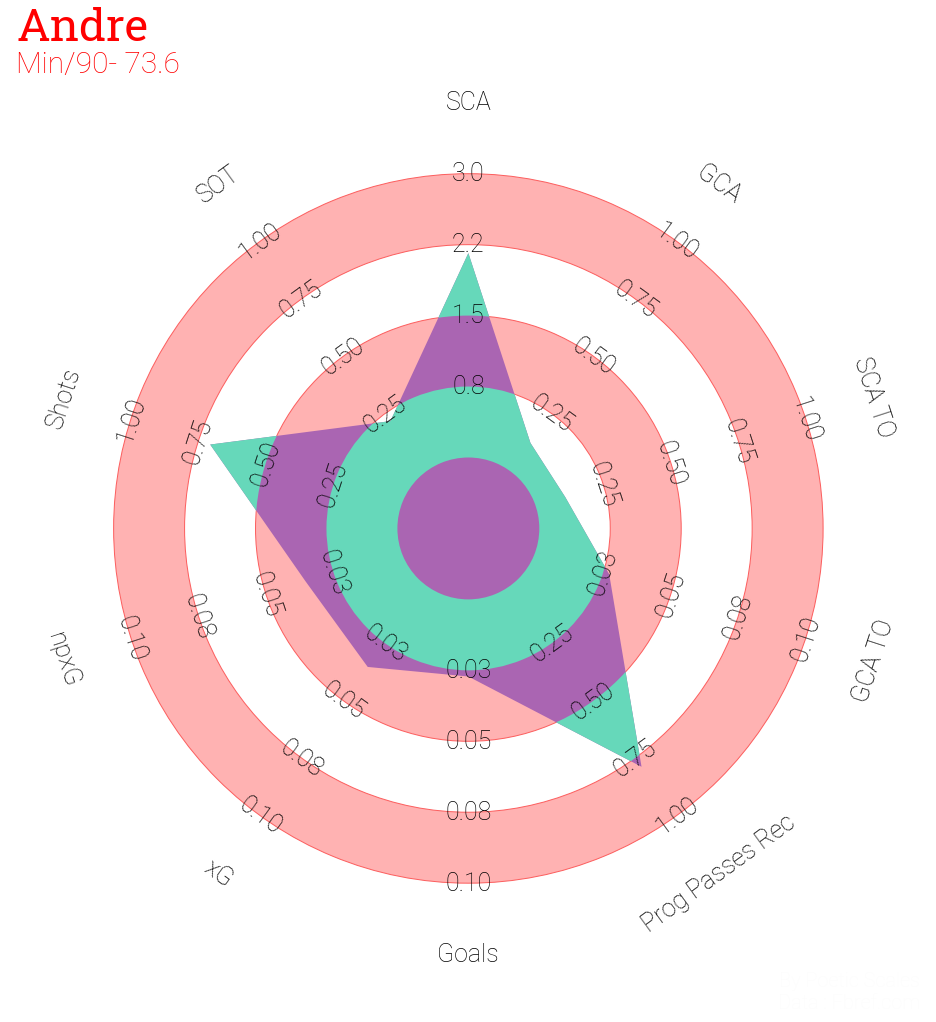

In [53]:

params = ['SCA','GCA','SCA TO','GCA TO','Prog Passes Rec','Goals','xG','npxG','Shots','SOT']

low = [0,0,0,0,0,0,0,0,0,0]
high = [3,1,1,0.1,1,0.1,0.1,0.1,1,1]



radar = Radar(params, low, high,
          # whether to round any of the labels to integers instead of decimal places
          round_int=[False]*len(params),
          num_rings=4,  # the number of concentric circles (excluding center circle)
          # if the ring_width is more than the center_circle_radius then
          # the center circle radius will be wider than the width of the concentric circles
          ring_width=1, center_circle_radius=1)

fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'])
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar(player1_df_value, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.9, "By Poetic Scales\nData : Fbref.com", fontsize=20,color='#fcfcfc',
                                       fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, player, fontsize=45, color='red',
                                fontproperties=robotto_bold.prop, ha='left', va='center')

title2_text = axs['title'].text(0.01, 0.05, f"Min/90- {per_90s}", fontsize=30,
                            fontproperties=robotto_thin.prop,
                            ha='left', va='center', color='red')
os.chdir(goals_shots_dir)
#plt.savefig(f"{player}_goals_shots.png")
my_pdf = PdfPages(f"{player}_goals_shots.pdf")
my_pdf.savefig()
my_pdf.close()


In [54]:
def comp_radar_chart(similar_player):
    player2_df = goals_shots_df.loc[df['Player']==similar_player]
    player2_90s = player2_df['90s']
    
    player2_df = player2_df.iloc[:,3:]
    player2_df = player2_df.div(player2_df['90s'],axis=0)
    player2_df_value = player2_df.iloc[:,1:].values.tolist()
    player2_df_value =player2_df_value[0]
    
    
    
    params = ['SCA','GCA','SCA TO','GCA TO','Prog Passes Rec','Goals','xG','npxG','Shots','SOT']

    low = [0,0,0,0,0,0,0,0,0,0]
    high =[3,1,1,0.1,1,0.1,0.1,0.1,1,1]

    

    radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)
    
    fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

    # plot radar
    radar.setup_axis(ax=axs['radar'],facecolor='None')  # format axis as a radar
    rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
    radar_output = radar.draw_radar_compare(player1_df_value,player2_df_value, ax=axs['radar'],
                                            kwargs_radar={'facecolor': 'red', 'alpha': 0.6},
                                            kwargs_compare={'facecolor': '#01c49d', 'alpha': 0.6})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output
    range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=29,color='#fcfcfc',
                                           fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,color='#fcfcfc',
                                           fontproperties=robotto_thin.prop)
    axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                         c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
    axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                         c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

    # adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
    # Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
    endnote_text = axs['endnote'].text(0.99, 0.9, "By Poetic Scales\nData : Fbref.com", fontsize=20,color='#fcfcfc',
                                       fontproperties=robotto_thin.prop, ha='right', va='center')
    title1_text = axs['title'].text(0.01, 0.65, player, fontsize=45, color='red',
                                    fontproperties=robotto_bold.prop, ha='left', va='center')
    
    title2_text = axs['title'].text(0.01, 0.05, f"Min/90- {per_90s}", fontsize=30,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='red')

    title3_text = axs['title'].text(0.99, 0.65, similar_player, fontsize=35,
                                    fontproperties=robotto_bold.prop,
                                    ha='right', va='center', color='#01c49d')
    title4_text = axs['title'].text(0.99, 0.05, f"Min/90- {float(player2_90s)}", fontsize=30,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#01c49d')
    fig.set_facecolor('#121212')
    #plt.savefig(f"vs {similar_player}_goals_shots.png")
    my_pdf = PdfPages(f"vs {similar_player}_goals_shot.pdf")
    my_pdf.savefig()
    my_pdf.close()

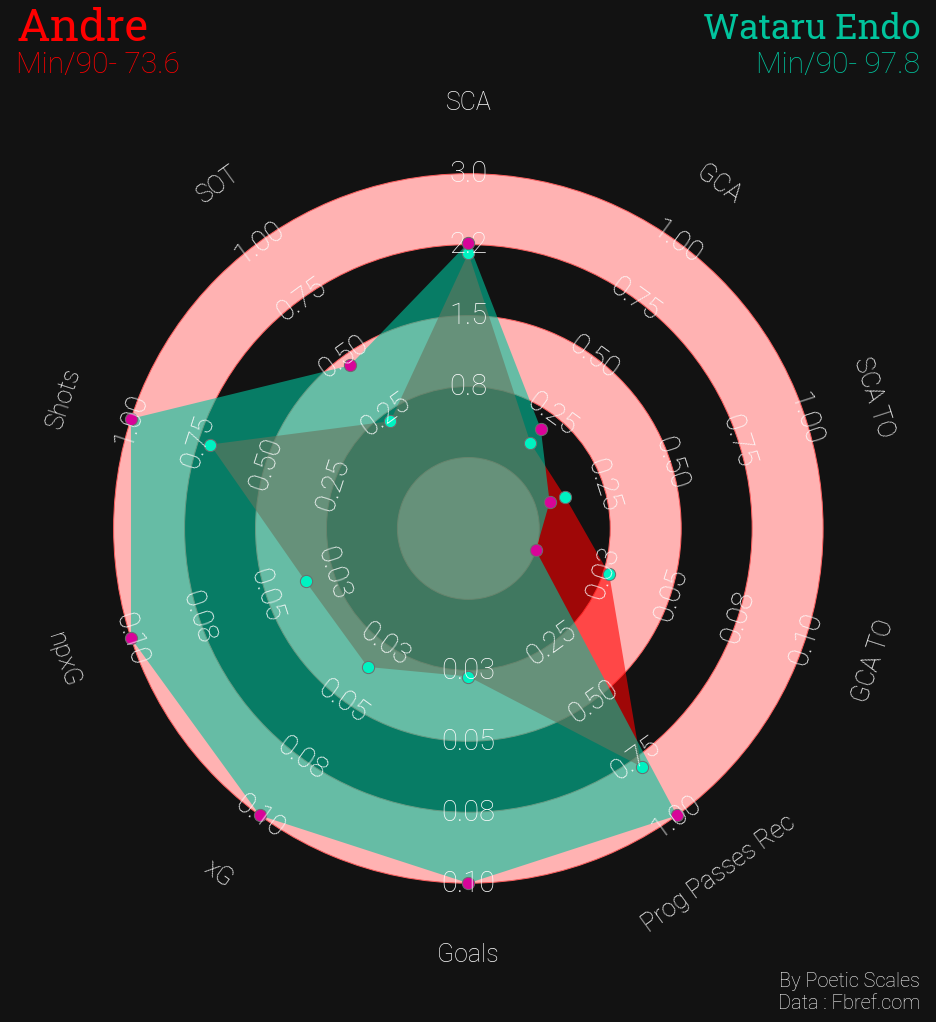

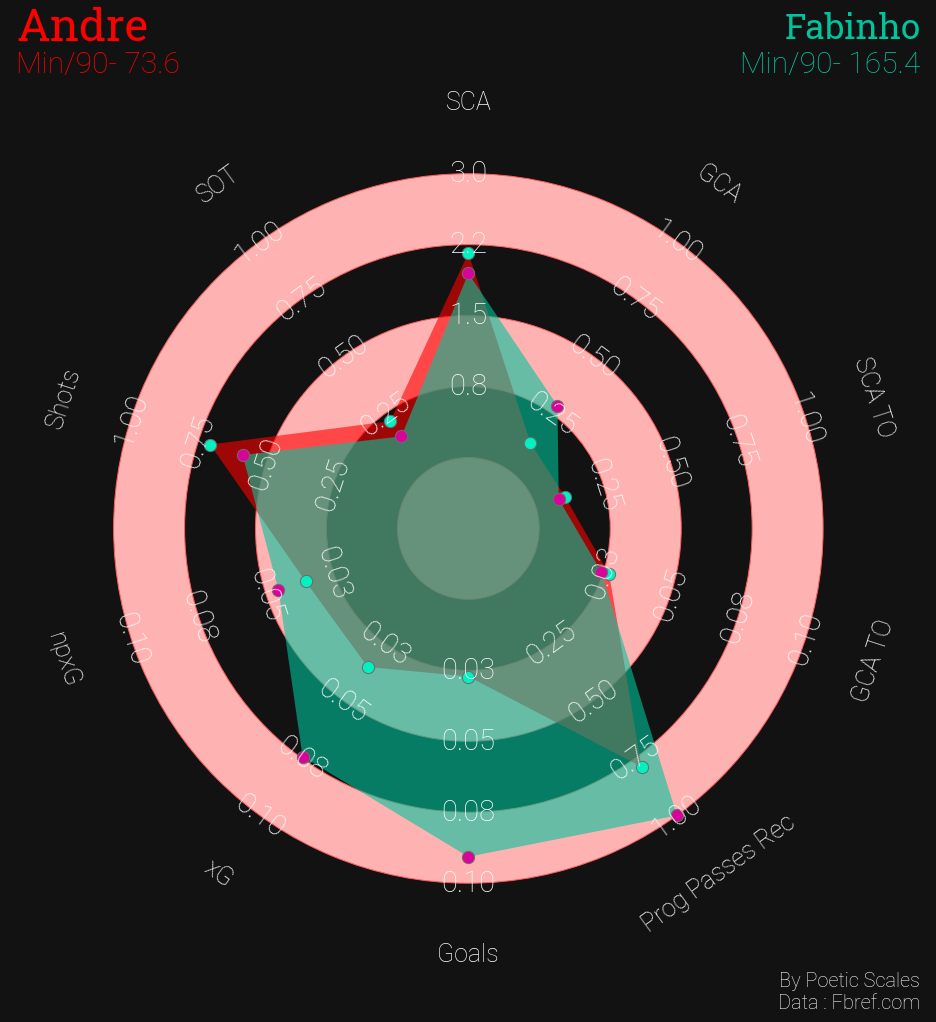

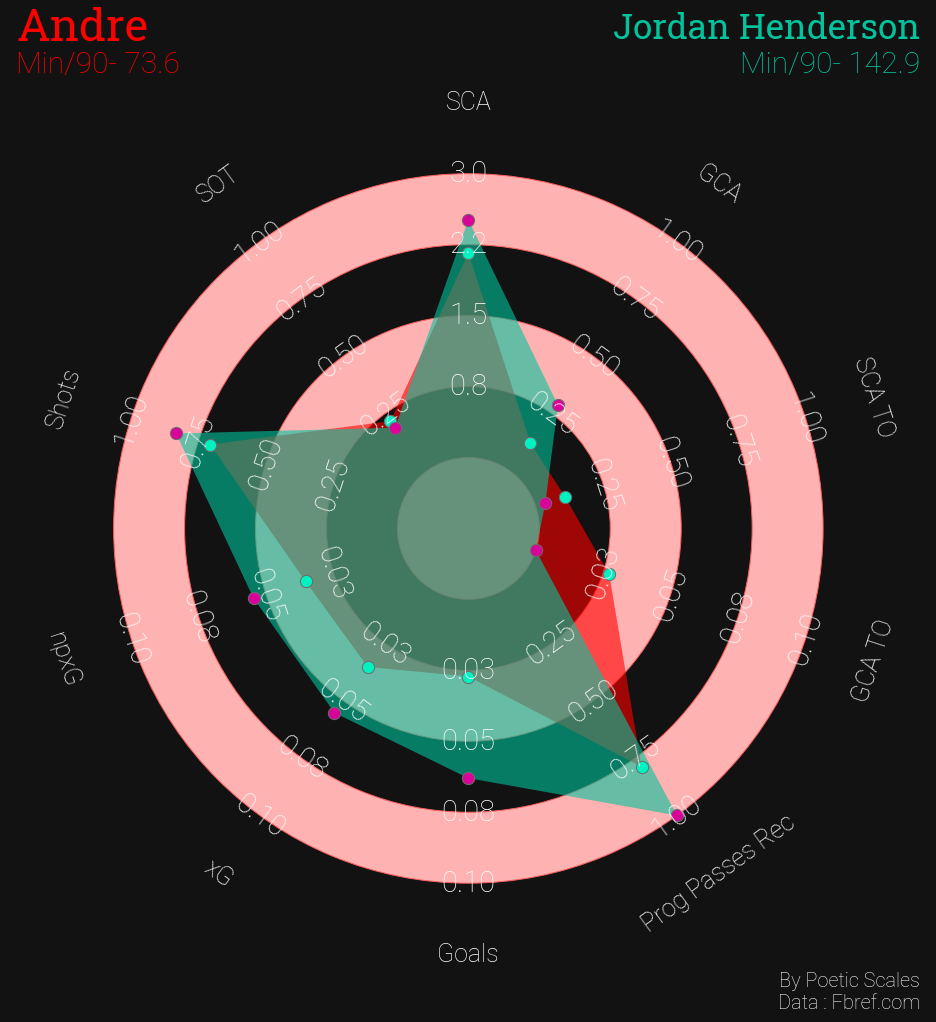

In [55]:
for i in all_players:
    comp_radar_chart(similar_player=i)

In [56]:
import os
from PyPDF2 import PdfMerger, PdfReader
file_list = os.listdir(goals_shots_dir)
file_list_sorted = sorted(file_list, key=lambda x: os.path.getmtime(os.path.join(goals_shots_dir, x)))
file_list_sorted

# Get a list of all PDF files in the directory
pdf_files = [f for f in file_list_sorted if f.endswith('.pdf')]

# Create a PdfFileMerger object
merger = PdfMerger()

# Loop through all the PDF files and append them to the merger object
for filename in pdf_files:
    with open(os.path.join(goals_shots_dir, filename), 'rb') as f:
        pdf_reader = PdfReader(f)
        merger.append(pdf_reader)
#os.chdir(team_player_pdf_dir)
# Write the merged PDF file to disk
with open(f"{player}_comparision_goals_shots.pdf", 'wb') as f:
    merger.write(f)


# Pass and Carry

In [57]:
final_pass_carry_df.head()

,Player,Nation,Pos,90s,PrgDist of Passes,Ast,xA,KP,Passes in final 3rd,PPA,CrsPA,PrgP,Passes_offside,Passes_Blocked,Carries,PrgDist of Carries,Prog Carries,Carries in 1/3,CPA,Miscontrols,Dispossessed
0,André,br BRA,"MF,FW",73.6,22032,2,3.5,56,446,24,3,431,6,57,3867,11071,110,132,6,88,58
1,Wataru Endo,jp JPN,MF,97.8,21376,9,8.7,94,439,61,4,525,19,98,3233,7307,101,98,15,157,147
2,Fabinho,br BRA,MF,165.4,43769,11,10.7,108,824,110,8,939,21,88,7190,16595,171,178,15,107,77
3,Jordan Henderson,eng ENG,MF,142.9,45610,17,17.7,147,1128,212,44,1209,28,155,7900,17342,256,249,17,113,52


In [58]:
player1_df = final_pass_carry_df.iloc[0:1,3:]
player1_df = player1_df.div(player1_df['90s'],axis=0)
player1_df_value = player1_df.iloc[:,1:].values.tolist()
player1_df_value =player1_df_value[0]
player1_df_value

[299.34782608695656,
 0.027173913043478264,
 0.04755434782608696,
 0.7608695652173914,
 6.059782608695652,
 0.32608695652173914,
 0.04076086956521739,
 5.855978260869565,
 0.08152173913043478,
 0.7744565217391305,
 52.54076086956522,
 150.42119565217394,
 1.4945652173913044,
 1.7934782608695654,
 0.08152173913043478,
 1.1956521739130437,
 0.7880434782608696]

In [59]:
player1_df

,90s,PrgDist of Passes,Ast,xA,KP,Passes in final 3rd,PPA,CrsPA,PrgP,Passes_offside,Passes_Blocked,Carries,PrgDist of Carries,Prog Carries,Carries in 1/3,CPA,Miscontrols,Dispossessed
0,1.0,299.347826,0.027174,0.047554,0.76087,6.059783,0.326087,0.040761,5.855978,0.081522,0.774457,52.540761,150.421196,1.494565,1.793478,0.081522,1.195652,0.788043


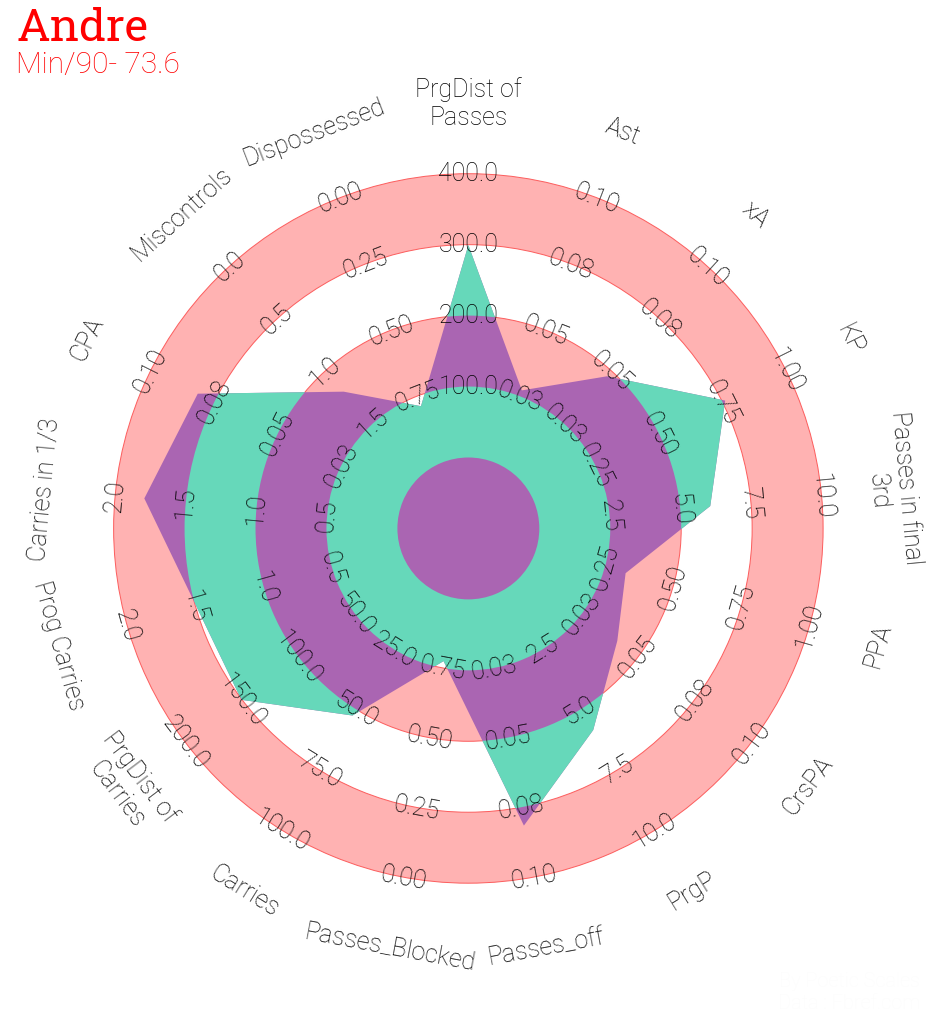

In [60]:
player1_df = final_pass_carry_df.iloc[0:1,3:]
player1_df = player1_df.div(player1_df['90s'],axis=0)
player1_df_value = player1_df.iloc[:,1:].values.tolist()
player1_df_value =player1_df_value[0]
params = ['PrgDist of Passes','Ast','xA','KP','Passes in final 3rd','PPA','CrsPA','PrgP','Passes_off','Passes_Blocked',
         'Carries','PrgDist of Carries','Prog Carries','Carries in 1/3','CPA','Miscontrols','Dispossessed']

low = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
high = [400,0.1,0.1,1,10,1,0.1,10,0.1,1,100,200,2,2,0.1,2,1]

lower_is_better = ['Passes_offside','Passes_Blocked','Miscontrols','Dispossessed']

radar = Radar(params, low, high,lower_is_better=lower_is_better,
          # whether to round any of the labels to integers instead of decimal places
          round_int=[False]*len(params),
          num_rings=4,  # the number of concentric circles (excluding center circle)
          # if the ring_width is more than the center_circle_radius then
          # the center circle radius will be wider than the width of the concentric circles
          ring_width=1, center_circle_radius=1)

fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'])
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar(player1_df_value, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.9, "By Poetic Scales\nData : Fbref.com", fontsize=20,color='#fcfcfc',
                                       fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, player, fontsize=45, color='red',
                                fontproperties=robotto_bold.prop, ha='left', va='center')

title2_text = axs['title'].text(0.01, 0.05, f"Min/90- {per_90s}", fontsize=30,
                            fontproperties=robotto_thin.prop,
                            ha='left', va='center', color='red')
os.chdir(final_pass_carry_dir)
#plt.savefig(f"{player}_pass_carry.png")
my_pdf = PdfPages(f"{player}_pass_carry.pdf")
my_pdf.savefig()
my_pdf.close()



In [61]:
def comp_radar_chart(similar_player):
    player2_df = final_pass_carry_df.loc[df['Player']==similar_player]
    player2_90s = player2_df['90s']
    
    player2_df = player2_df.iloc[:,3:]
    player2_df = player2_df.div(player2_df['90s'],axis=0)
    player2_df_value = player2_df.iloc[:,1:].values.tolist()
    player2_df_value =player2_df_value[0]
    
    
    
    params = ['PrgDist of Passes','Ast','xA','KP','Passes in final 3rd','PPA','CrsPA','PrgP','Passes_off','Passes_Blocked',
         'Carries','PrgDist of Carries','Prog Carries','Carries in 1/3','CPA','Miscontrols','Dispossessed']

    low = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    high =[400,0.1,0.1,1,10,1,0.1,10,0.1,1,100,200,2,2,0.1,2,1]

    lower_is_better = ['Passes_offside','Passes_Blocked','Miscontrols','Dispossessed']

    radar = Radar(params, low, high,lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)
    
    fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

    # plot radar
    radar.setup_axis(ax=axs['radar'],facecolor='None')  # format axis as a radar
    rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
    radar_output = radar.draw_radar_compare(player1_df_value,player2_df_value, ax=axs['radar'],
                                            kwargs_radar={'facecolor': 'red', 'alpha': 0.6},
                                            kwargs_compare={'facecolor': '#01c49d', 'alpha': 0.6})
    radar_poly, radar_poly2, vertices1, vertices2 = radar_output
    range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=29,color='#fcfcfc',
                                           fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,color='#fcfcfc',
                                           fontproperties=robotto_thin.prop)
    axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                         c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
    axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                         c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

    # adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
    # Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
    endnote_text = axs['endnote'].text(0.99, 0.9, "By Poetic Scales\nData : Fbref.com", fontsize=20,color='#fcfcfc',
                                       fontproperties=robotto_thin.prop, ha='right', va='center')
    title1_text = axs['title'].text(0.01, 0.65, player, fontsize=45, color='red',
                                    fontproperties=robotto_bold.prop, ha='left', va='center')
    
    title2_text = axs['title'].text(0.01, 0.05, f"Min/90- {per_90s}", fontsize=30,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='red')

    title3_text = axs['title'].text(0.99, 0.65, similar_player, fontsize=35,
                                    fontproperties=robotto_bold.prop,
                                    ha='right', va='center', color='#01c49d')
    title4_text = axs['title'].text(0.99, 0.05, f"Min/90- {float(player2_90s)}", fontsize=30,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#01c49d')
    fig.set_facecolor('#121212')
    #plt.savefig(f"vs {similar_player}_pass_carry.png")
    my_pdf = PdfPages(f"vs {similar_player}_pass_carry..pdf")
    my_pdf.savefig()
    my_pdf.close()


In [62]:
final_pass_carry_df['Player'].unique()

array(['André', 'Wataru Endo', 'Fabinho', 'Jordan Henderson'],
      dtype=object)

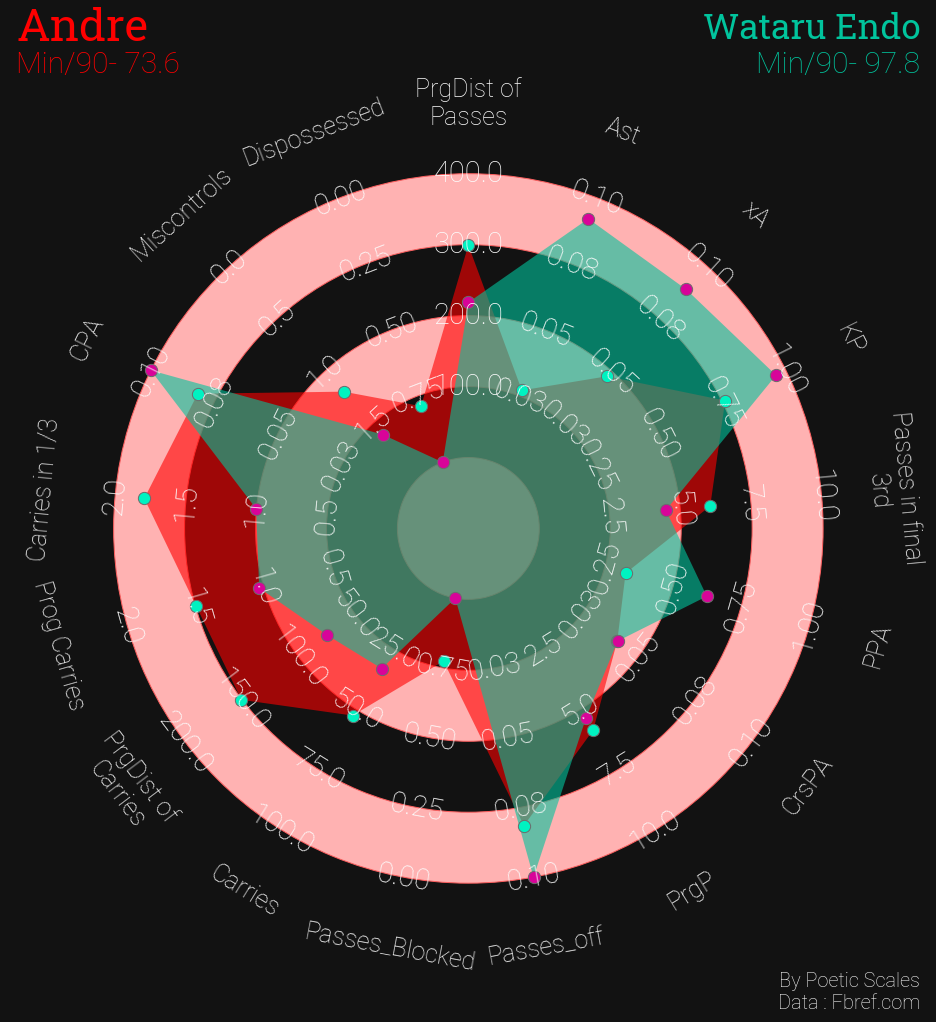

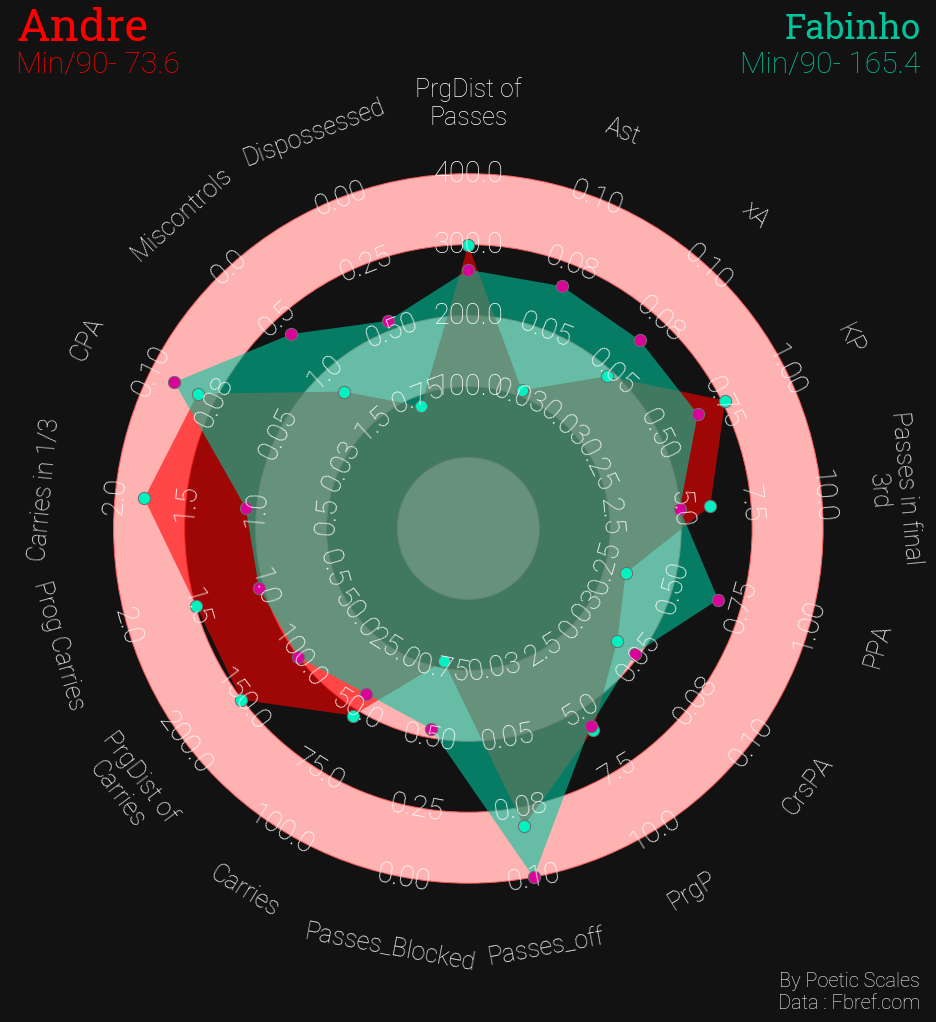

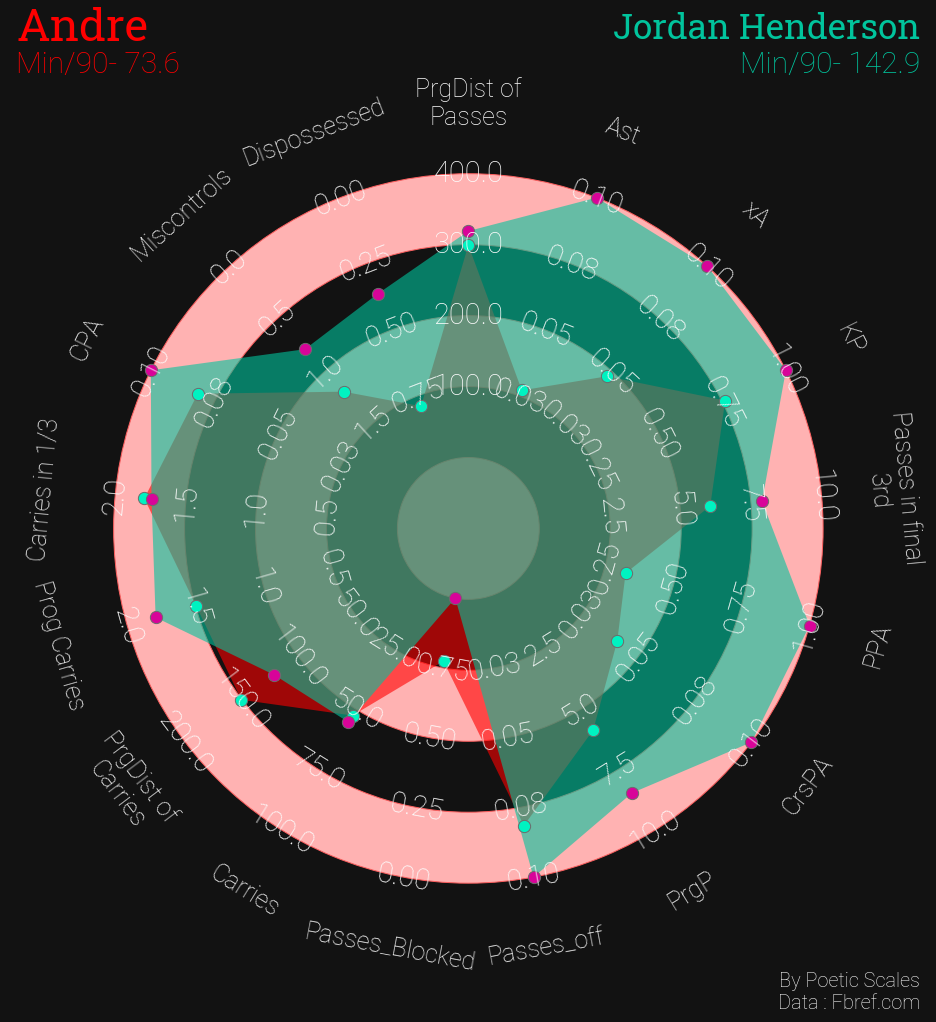

In [63]:
for i in all_players:
    comp_radar_chart(similar_player=i)

In [64]:
import os
from PyPDF2 import PdfMerger, PdfReader
file_list = os.listdir(final_pass_carry_dir)
file_list_sorted = sorted(file_list, key=lambda x: os.path.getmtime(os.path.join(final_pass_carry_dir, x)))
file_list_sorted

# Get a list of all PDF files in the directory
pdf_files = [f for f in file_list_sorted if f.endswith('.pdf')]

# Create a PdfFileMerger object
merger = PdfMerger()

# Loop through all the PDF files and append them to the merger object
for filename in pdf_files:
    with open(os.path.join(final_pass_carry_dir, filename), 'rb') as f:
        pdf_reader = PdfReader(f)
        merger.append(pdf_reader)
#os.chdir(team_player_pdf_dir)
# Write the merged PDF file to disk
with open(f"{player}_comparision_pass_carry.pdf", 'wb') as f:
    merger.write(f)
